In [1]:
pip install pytrends 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import  pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

setup pytrend library and keyword define

In [4]:
pytrends= TrendReq(hl = 'en-US',tz= 360) 
# tz- timezone, lang= english us 
keyword= "Machine Learning"

Data Request from google trends 

In [5]:
pytrends.build_payload([keyword],cat=0,timeframe = 'today 12-m',geo='',gprop ='')
#cat-category =0 means all category geo = '' means global level ka data ,timeframe kha tk ka data chahiye 

In [6]:
data = pytrends.interest_over_time()

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


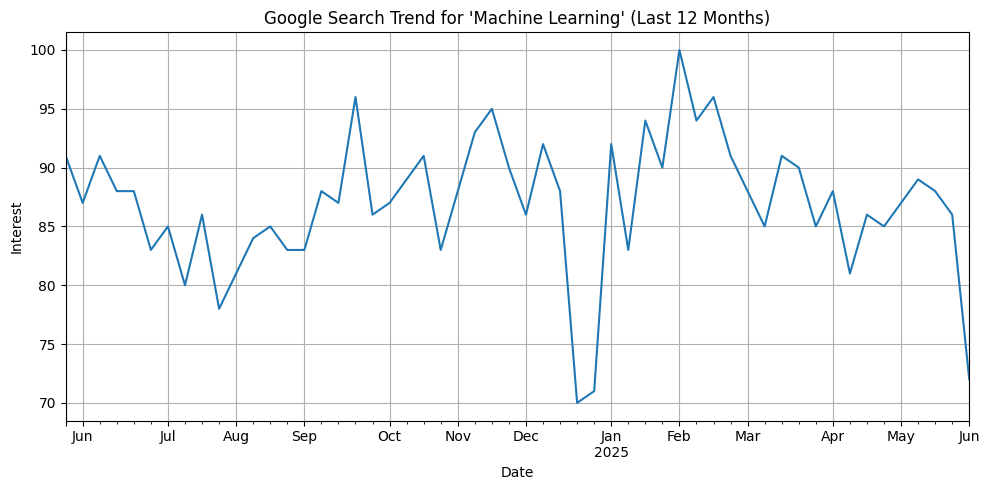

In [7]:
if not data.empty:
    data[keyword].plot(figsize=(10,5), title=f"Google Search Trend for '{keyword}' (Last 12 Months)")
    plt.xlabel('Date')
    plt.ylabel('Interest')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data found for the given keyword.")

country wise interest 

In [8]:
region_data = pytrends.interest_by_region()
region_data=region_data.sort_values(by = keyword, ascending=False ).head(15) 

C:\Users\hp\AppData\Local\Temp\ipykernel_12016\4211561263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword],y=region_data.index,palette = "Set2")


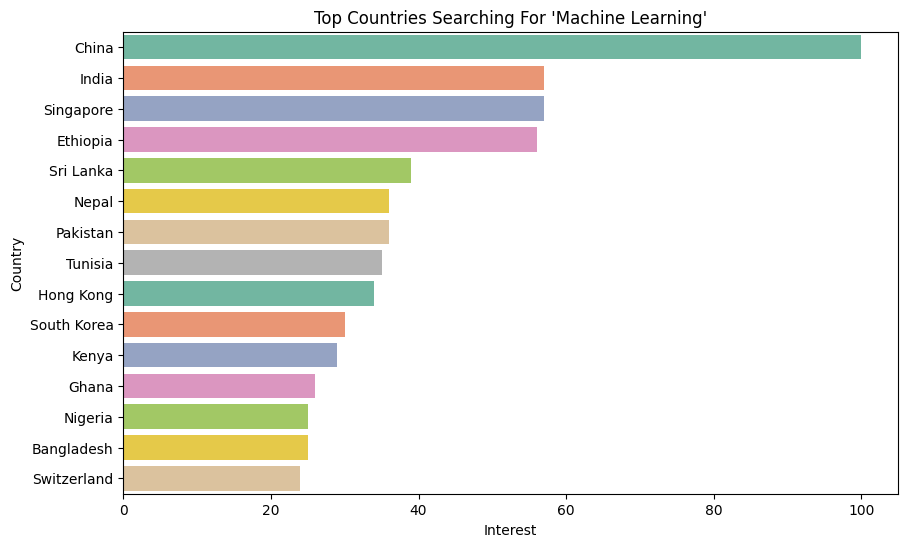

In [9]:
plt.figure(figsize = (10,6))
sns.barplot(x=region_data[keyword],y=region_data.index,palette = "Set2")
plt.title(f"Top Countries Searching For '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

plotting world map 

In [10]:
region_data= region_data.reset_index()
fig=px.choropleth(region_data,
                  locations='geoName' ,
                  locationmode='country names' , 
                  color=keyword,
                  title=f"Search Interest for  '{keyword}' by Country " ,
                  color_continuous_scale='Blues')
fig.show()                  
#choropleth is used to plot the world map using plotliy lib 

Time wise intrerst for the keyword 

In [11]:
time_df=pytrends.interest_over_time()

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



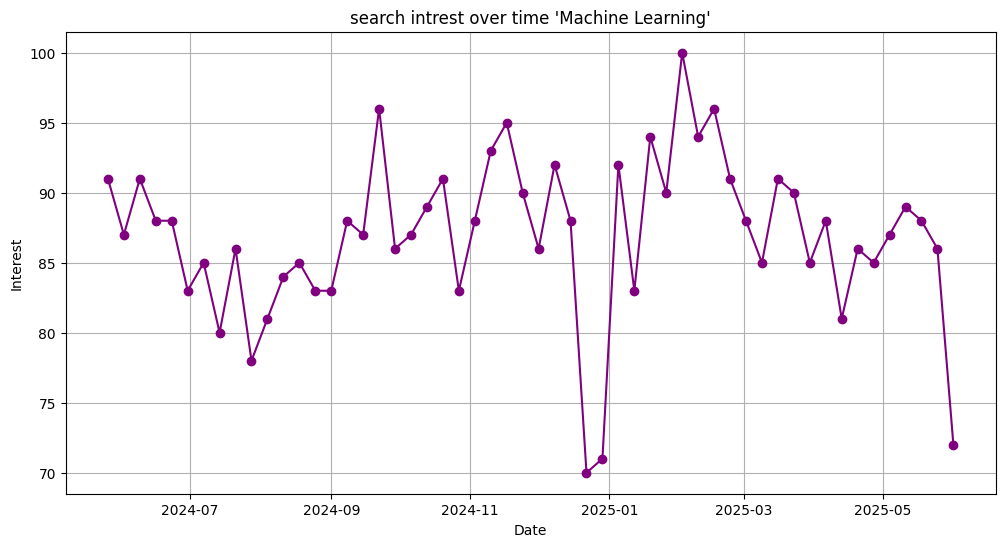

In [12]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color= 'purple')
plt.title(f"search intrest over time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

Compare  multiple keyword and plot the graph

In [16]:
kw_list = ["ChatGPT", "Generative AI", "AI tools", "Machine Learning", "OpenAI"]
pytrends.build_payload(kw_list,cat=0,timeframe = 'today 12-m',geo= '',gprop= '')

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



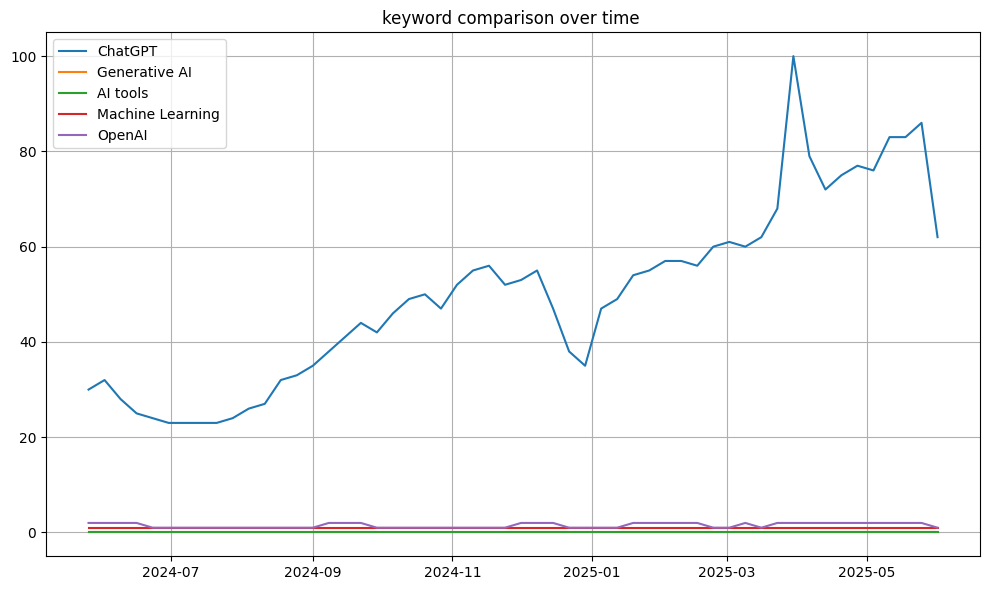

In [18]:
compare_df= pytrends.interest_over_time()
plt.figure(figsize=(10,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label=kw)
plt.title("keyword comparison over time ")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in 

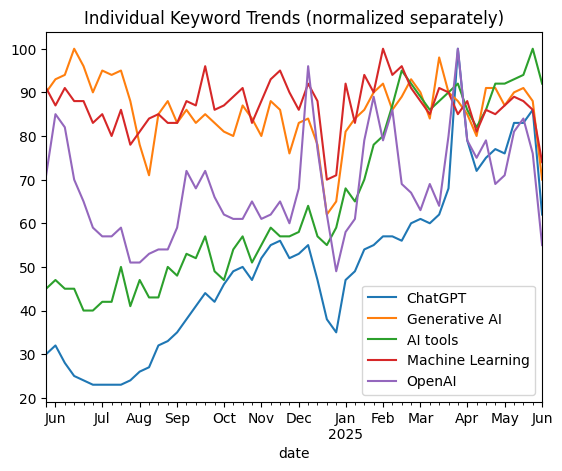

In [19]:
kw_list = ["ChatGPT", "Generative AI", "AI tools", "Machine Learning", "OpenAI"]

for kw in kw_list:
    pytrends.build_payload([kw], timeframe='today 12-m')
    df = pytrends.interest_over_time()
    df[kw].plot(label=kw)

plt.legend()
plt.title('Individual Keyword Trends (normalized separately)')
plt.show()


In [20]:
pip install streamlit

In [28]:
from flask import Flask, render_template_string, request
import threading
import webbrowser
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import io
import base64

app = Flask(__name__)

AVAILABLE_KEYWORDS = [
    "ChatGPT", "Generative AI", "AI tools", "Machine Learning",
    "OpenAI", "Data Science", "Deep Learning", "Python", "Artificial Intelligence"
]

@app.route("/", methods=["GET", "POST"])
def home():
    selected_keywords = request.form.getlist("keywords")
    if not selected_keywords:
        selected_keywords = ["ChatGPT", "Generative AI"]

    pytrends = TrendReq()
    pytrends.build_payload(selected_keywords, timeframe='today 12-m')
    df = pytrends.interest_over_time()

    fig, ax = plt.subplots(figsize=(10, 5))
    for kw in selected_keywords:
        ax.plot(df.index, df[kw], label=kw)
    ax.set_title("Keyword Comparison Over Time", fontsize=14)
    ax.set_xlabel("Date")
    ax.set_ylabel("Interest")
    ax.legend()
    ax.grid(alpha=0.2)
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format="png", transparent=True)
    buf.seek(0)
    img_data = base64.b64encode(buf.read()).decode()
    plt.close()

    html = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8" />
        <meta name="viewport" content="width=device-width, initial-scale=1.0" />
        <title>Google Trends UI Clone</title>
        <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;500&display=swap" rel="stylesheet">
        <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
        <link href="https://cdn.jsdelivr.net/npm/select2@4.1.0-rc.0/dist/css/select2.min.css" rel="stylesheet" />
        <style>
            body {{
                font-family: 'Roboto', sans-serif;
                background-color: #f1f3f4;
                margin: 0;
                padding: 0;
            }}
            .container {{
                max-width: 800px;
                margin: 60px auto;
                background: #fff;
                padding: 40px;
                border-radius: 12px;
                box-shadow: 0 2px 8px rgba(0, 0, 0, 0.1);
            }}
            h1 {{
                font-size: 2rem;
                font-weight: 500;
                text-align: center;
                margin-bottom: 30px;
            }}
            label {{
                font-size: 1rem;
                margin-bottom: 10px;
                font-weight: 500;
            }}
            .select2-container .select2-selection--multiple {{
                border-radius: 6px;
                height: auto;
                min-height: 45px;
                font-size: 1rem;
                padding: 4px 6px;
            }}
            .btn-primary {{
                font-size: 1rem;
                font-weight: 500;
                padding: 10px 20px;
                border-radius: 6px;
                margin-top: 10px;
            }}
            .img-container {{
                margin-top: 40px;
                text-align: center;
            }}
            .img-container img {{
                width: 100%;
                max-height: 400px;
                object-fit: contain;
            }}
            footer {{
                text-align: center;
                color: #888;
                margin-top: 40px;
                font-size: 0.9rem;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Google Trends: Keyword Comparison</h1>
            <form method="POST">
                <label for="keywords">Compare Keywords:</label>
                <select id="keywords" name="keywords" multiple="multiple">
                    {''.join(f'<option value="{kw}" {"selected" if kw in selected_keywords else ""}>{kw}</option>' for kw in AVAILABLE_KEYWORDS)}
                </select>
                <button type="submit" class="btn btn-primary">Update Trends</button>
            </form>
            <div class="img-container">
                <img src="data:image/png;base64,{img_data}" alt="Trends Chart" />
            </div>
        </div>
        <footer>
            Powered by <a href="https://trends.google.com" target="_blank">Google Trends</a> and PyTrends
        </footer>

        <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script>
        <script src="https://cdn.jsdelivr.net/npm/select2@4.1.0-rc.0/dist/js/select2.min.js"></script>
        <script>
            $(document).ready(function() {{
                $('#keywords').select2({{
                    placeholder: "Select or type keywords",
                    width: '100%'
                }});
            }});
        </script>
    </body>
    </html>
    """
    return render_template_string(html)

def run_app():
    app.run(port=5000)

if __name__ == "__main__":
    threading.Thread(target=run_app).start()
    webbrowser.open("http://127.0.0.1:5000")

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
